# Assignment 1 - KMeans - Kieran Gregg

# Dataset 1 (blobs)



### PART ONE : EDA

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

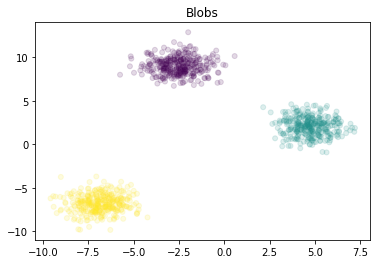

In [2]:
# setting up a generated blobs dataset for 2d plotting
from sklearn.datasets import make_blobs
blobs, labels = make_blobs(n_samples=1000, n_features=2, random_state=42)

# the figure printed below plots the blobs dataset, which can be seen to have mostly distinct shapes
plt.scatter(blobs[:, 0], blobs[:, 1], c=labels, s=25, alpha=0.15)
plt.title("Blobs")
plt.show()

### PART TWO : Implement KMeans

In [3]:
num_clusters = 3

In [4]:
# running the built in KMeans algorithm on our blobs dataset, with 3 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(blobs)
centers = kmeans.cluster_centers_

# output blobs to csv, to be read by my Kmeans
blobs_df = pd.DataFrame(blobs)
blobs_df.to_csv("blobs.csv", header=None, index=False)

In [5]:
# Running my Java Kmeans
import os

input_path = "blobs.csv"
labels_output_path = "blobs_labels_output.csv"
centers_output_path = "blobs_centers_output.csv"
random_state = 42
num_centroids = num_clusters
num_max_iterations = 100

cwd = os.getcwd()
os.chdir(cwd)
os.system('javac KMeans.java')   
run_command = "java " + "KMeans " + input_path + " " + labels_output_path + " " + centers_output_path + " " + str(random_state) + " " + str(num_centroids) + " " + str(num_max_iterations) 
os.system(run_command)

# store the labels and centers from the csv files generated by java kmeans
output_labels = pd.read_csv("blobs_labels_output.csv", header=None).to_numpy().flatten()
output_centers = pd.read_csv("blobs_centers_output.csv", header=None).to_numpy()

args [blobs.csv, blobs_labels_output.csv, blobs_centers_output.csv, 42, 3, 100]

current iteration: 0
centroid: 0 at coordinates: 6.715139708853367, 1.2839818658511641
centroid: 1 at coordinates: -1.5029048138383097, 8.437394258675173
centroid: 2 at coordinates: -6.906032948110197, -6.59994843445634

current iteration: 1
centroid: 0 at coordinates: 4.728634099184566, 2.0555726610160057
centroid: 1 at coordinates: -2.524141786876686, 9.003942833455842
centroid: 2 at coordinates: -6.866562533911905, -6.785194271441719

total iterations run: 2


#### ^Only 2 iterations are run, as KMeans quickly finds and sets the centroids to the center of the blobs, as the blobs are very distinct
#### The first iteration (0) is the randomly selected initial position for the centroids (chosen from one of the random blob points)
#### After the second iteration (1), the centroids are in their final position

### PART THREE : Comparing Implemented KMeans to Sklearn's KMeans

In [6]:
# Comparing performance using v_measure_score
from sklearn.metrics import v_measure_score

score = v_measure_score(labels, output_labels)
score

1.0

#### ^My implementation receives a score of 1.0 (100%) for the blobs data

In [7]:
# Comparing the centers from the sklearn kmeans to the calculated centers from my kmeans

print("sklearn centers\n", centers, "\n")
print("my java kmeans centers\n", output_centers)

sklearn centers
 [[-6.86656253 -6.78519427]
 [ 4.7286341   2.05557266]
 [-2.52414179  9.00394283]] 

my java kmeans centers
 [[ 4.7286341   2.05557266]
 [-2.52414179  9.00394283]
 [-6.86656253 -6.78519427]]


#### ^The output for the centers is the same

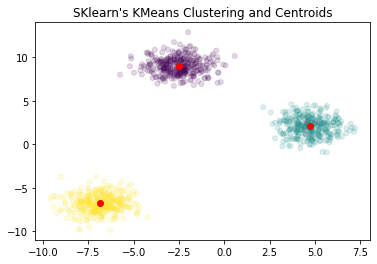

In [8]:
# plotting the blobs dataset 
plt = plt
plt.scatter(blobs[:,0], blobs[:,1], s=25, c=labels, alpha=0.15)
# plotting the centers of our cluster from sklearn's kmeans
plt.scatter(centers[:,0], centers[:,1], color='red')

plt.title("SKlearn's KMeans Clustering and Centroids")
plt.show()

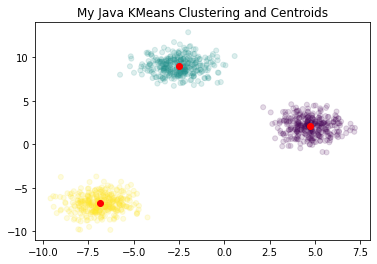

In [9]:
# plotting the blobs dataset 
plt.scatter(blobs[:,0], blobs[:,1], s=25, c=output_labels, alpha=0.15)
# plotting the centers of our cluster from sklearn's kmeans
plt.scatter(output_centers[:,0], output_centers[:,1], color='red')

plt.title("My Java KMeans Clustering and Centroids")
plt.show()

#### Taking a look at the scores and the centers comparatively between the sklearn KMeans and my Java Kmeans, in addition to the two plots above, it is clear my implementation works very well and produces the expected results, finding the centers and assigning the clusters as intended